## CMPINF 2100: Homework 08

### Fengyang Han

## Assigned: Tuesday of Week 10 at 11:00PM

## DUE: Tuesday of Week 11 at 11:59PM

## Overview

This assignment involves two distinct applications. The first, reviews and wraps up the unit on clustering by reinforcing why standardization is an essential pre-processing operation. The second introduces you to the fundamentals of fitting linear models using `statsmodels`, interperting the coefficients, interpreting model behavior through predictions, and calculating performance metrics.  

The clustering application corresponds to Problems 01 and 02. The linear model applications correspond to Problems 03 through 06.

**You must download the 3 data sets provided in the Canvas assignment page and save them to the appropriate directory on your computer.**

### Collaborators

Shiyi Wang


## Problem 00

You will work with the NumPy, Pandas, matplotlib.pyplot, and Seaborn modules in this assignment. Several other modules will be imported later, but you must begin by importing "the big 4".  

Import NumPy, Pandas, matplotlib.pyplot, and Seaborn using their commonly accepted aliases.

#### 00) - SOLUTION

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 01

The first two questions are focused on cluster analysis. You will use KMeans to execute the clustering, but the concepts also apply to hierarchical clustering. You will **not** perform a detailed visual exploration of the data for this problem. You have demonstrated Exploratory Data Analysis (EDA) skills on previous assignments. This question is focused on a very specific concept.

### 1a)

Read in the `hw08_cluster.csv` CSV file and assign it to the `dfC` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.  

#### 1a) - SOLUTION

In [94]:
dfC = pd.read_csv('./hw08_cluster.csv')
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      250 non-null    float64
 1   x2      250 non-null    float64
 2   x3      250 non-null    float64
 3   x4      250 non-null    float64
dtypes: float64(4)
memory usage: 7.9 KB


### 1b)

Use the Seaborn wide-format plotting options to create a BOXPLOT to visually show the summary statistics associated with each column on the same axis within a single figure.

What is the primary conclusion that you make about the columns based on this BOXPLOT?

#### 1b) - SOLUTION

Text(0, 0.5, 'value')

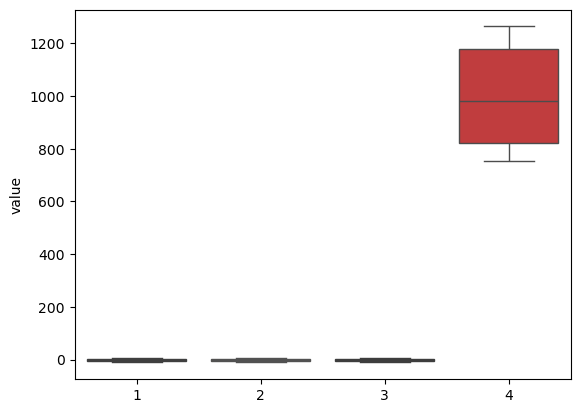

In [95]:
sns.boxplot(data=dfC, y='x1',x=1)
sns.boxplot(data=dfC, y='x2',x=2)
sns.boxplot(data=dfC, y='x3',x=3)
sns.boxplot(data=dfC, y='x4',x=4)

plt.ylabel('value')

The problem is that x4 has a much larger value, so it need to be standardized.

### 1c)

Visualize the marginal distributions and relationships between the columns using a pairs plot.

How many GROUPS or CLUSTERS do you expect to exist in the data based on the pairs plot?

#### 1c) - SOLUTION

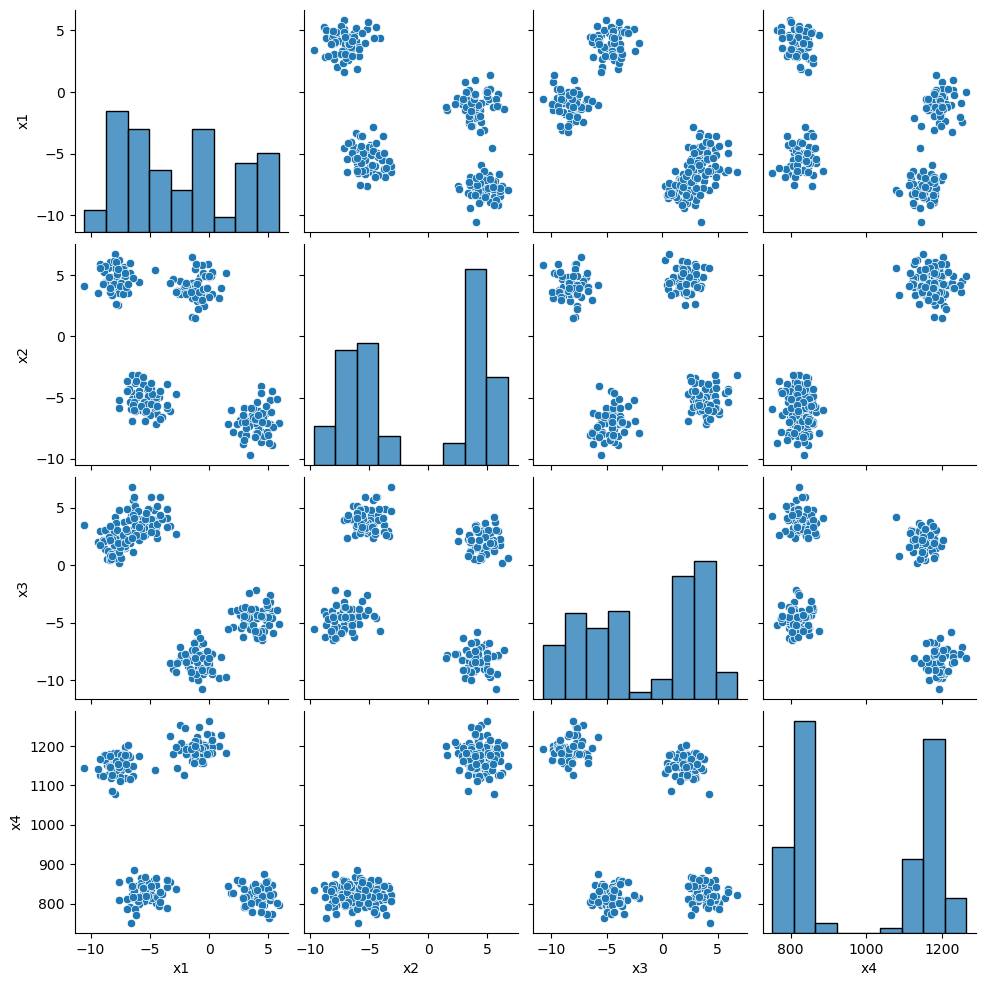

In [96]:
sns.pairplot(data=dfC)

4 clusters

### 1d)

Import `KMeans()` from the `sklearn.cluster` module.

Sklearn functions typically prefer working with NumPy arrays than Pandas DataFrames.

You must also convert the `dfC` DataFrame into a NumPy array. Assign the converted NumPy array to the `XC` object.

#### 1d) - SOLUTION

In [97]:
from sklearn.cluster import KMeans

In [98]:
XC = dfC.select_dtypes('number').copy().to_numpy()

### 1e)

You do not need to determine the optimal number of clusters using the "knee bend plot". Instead, you must execute the KMeans clustering with 4 clusters.

Cluster the observations within `dfC` into 4 clusters using the `XC` array. You must appropriately specify the remaining arguments to `KMeans()`. Assign the identified cluster labels to the `clusters_4C` object.

**Do NOT perform any preprocessing operations for this problem.**

#### 1e) - SOLUTION

In [99]:
# Cluster with 4 clusters using KMeans
clusters_4C = KMeans(n_clusters=4, random_state=121,n_init=25, max_iter=500).fit_predict(XC)

c:\Users\Fengyeng\anaconda3\envs\py3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 1f)

Create a copy of the `dfC` DataFrame named `dfC_copy`. Assign a new column to `dfC_copy` named `k4` which is equal to the identified cluster assignments. The `k4` column must be a category data type.

Display the COUNTS for each unique value of the `k4` column to the screen.

#### 1f) - SOLUTION

In [100]:
# shown unique value counts of each unique values
dfC_copy = dfC.copy()
dfC_copy['k4'] = pd.Series(clusters_4C, index=dfC_copy.index).astype('category')

dfC_copy.k4.value_counts()

2    75
3    72
1    53
0    50
Name: k4, dtype: int64

### 1g)

Visualize the cluster analysis results using a pairs plot. Color the observations in the pairs plot based on the `k4` column.

**IMPORTANT**: You must remove the SAMPLE SIZE effect for the conditional KDE plots in the pairs plot.

#### 1g) - SOLUTION

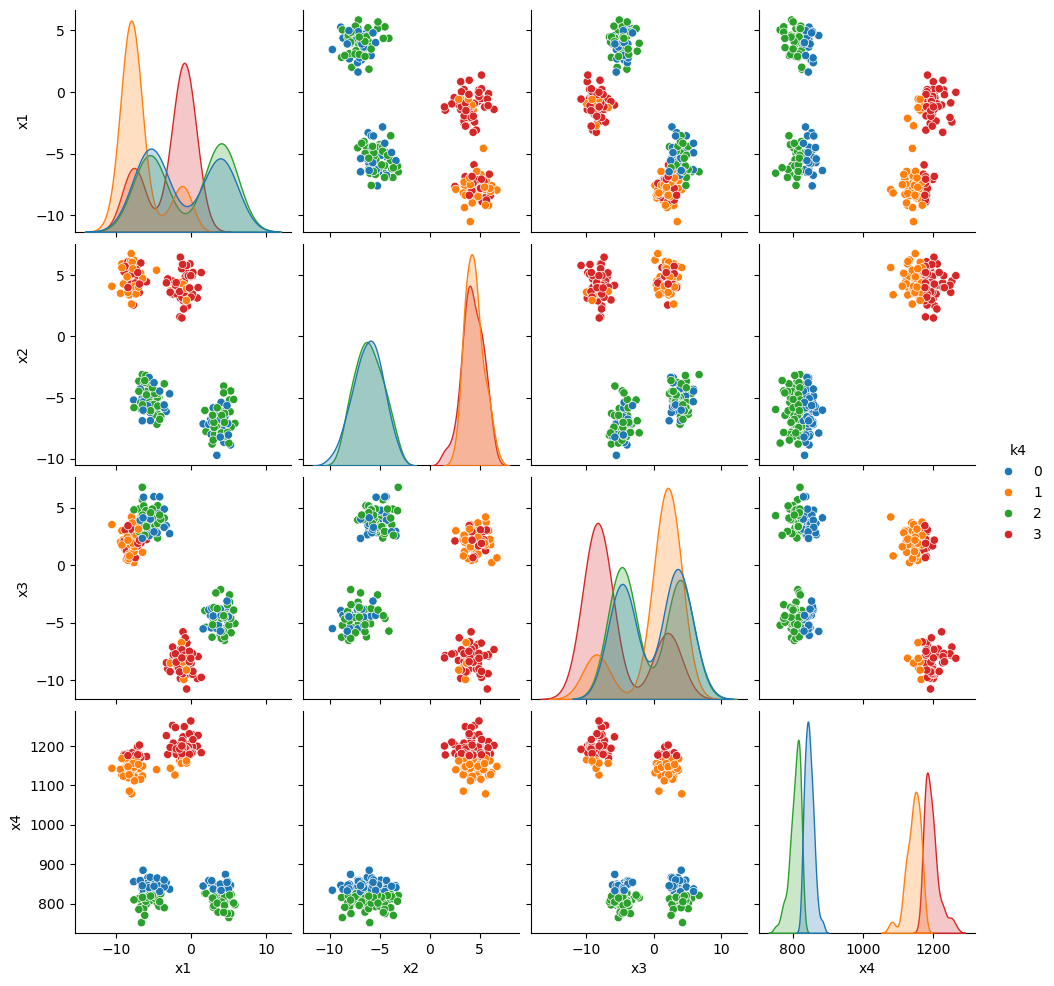

In [101]:
# visualize cluster analysis using pairplot with hue and removed SAMPLE SIZE
sns.pairplot(data=dfC_copy, hue='k4',
             diag_kws={'common_norm':False})

### 1h)

Are the 4 identified clusters consistent with what you expected them to be?

#### 1h) - SOLUTION

Type your response in a markdown cell below.

No they are not

## Problem 02

The cluster analysis results in Problem 01 may not be satisfying. But, you were supposed to use the **RAW** data for the clustering. You did **NOT** preprocess the columns **before** executing KMeans clustering.

Let's see if the cluster analysis results change if the columns are **Standardized** before clustering!

### 2a)

Import `StandardScaler()` from the `sklearn.preprocessing` module.

#### 2a) - SOLUTION

In [102]:
# clean the data and standardize the data
from sklearn.preprocessing import StandardScaler

### 2b)

Standardize the numeric columns in `dfC` using `StandardScaler()` and assign the transformed result to the `XC_stan` object.

Confirm the `XC_stan` object has the same dimensions as the `dfC` DataFrame.

#### 2b) - SOLUTION

In [103]:
# standardize the data
XC_clean = dfC.dropna().copy()
XC_clean_features = XC_clean.select_dtypes('number').copy()
XC_stan = StandardScaler().fit_transform(XC_clean_features)

In [104]:
# shape same
XC_stan.shape == dfC.shape

True

### 2c)

Let's confirm the standardization accomplished what we wanted it to.

Create a BOXPLOT using the Seaborn wide-format plotting options. Create a DataFrame from the `XC_stan` object which has the same column names as the `dfC` DataFrame to support the creation of the figure.

How does this BOXPLOT compare to the BOXPLOT from 1b)?

#### 2c) - SOLUTION

<AxesSubplot: >

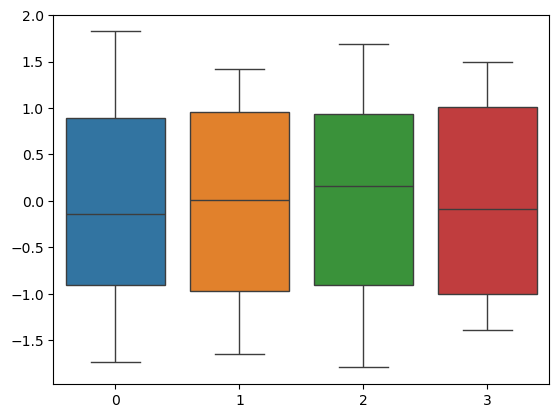

In [105]:
sns.boxplot(data=XC_stan)

It has a similar scale to show details of each column

### 2d)

You will now execute KMeans clustering again, but using the standardized columns contained in `XC_stan`. You will use 4 clusters again, just as you did in Problem 01.

Cluster the observations within `dfC` into 4 clusters using the standardized observations contained in the `XC_stan` array. You must appropriately specify the remaining arguments to `KMeans()`. Assign the identified cluster labels to the `clusters_4C_stan` object.

#### 2d) - SOLUTION

In [92]:
# Cluster with 4 clusters using KMeans
clusters_4C_stan = KMeans(n_clusters=4, random_state=121,n_init=25, max_iter=500).fit_predict(XC_stan)

c:\Users\Fengyeng\anaconda3\envs\py3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2e)

Assign a new column to `dfC_copy` named `k4_stan` which is equal to the identified cluster assignments contained in `clusters_4C_stan`. The `k4_stan` column must be a category data type.

Display the COUNTS for each unique value of the `k4_stan` column to the screen.

#### 2e) - SOLUTION

In [106]:
# shown unique value counts of each unique values
dfC_copy_stan = dfC.copy()
dfC_copy_stan['k4_stan'] = pd.Series(clusters_4C_stan, index=dfC_copy_stan.index).astype('category')

dfC_copy_stan.k4_stan.value_counts()

0    63
1    63
2    62
3    62
Name: k4_stan, dtype: int64

### 2f)

Visualize the cluster analysis results using a pairs plot. Color the observations in the pairs plot based on the `k4_stan` column.

**IMPORTANT**: You must remove the SAMPLE SIZE effect for the conditional KDE plots in the pairs plot.

#### 2f) - SOLUTION

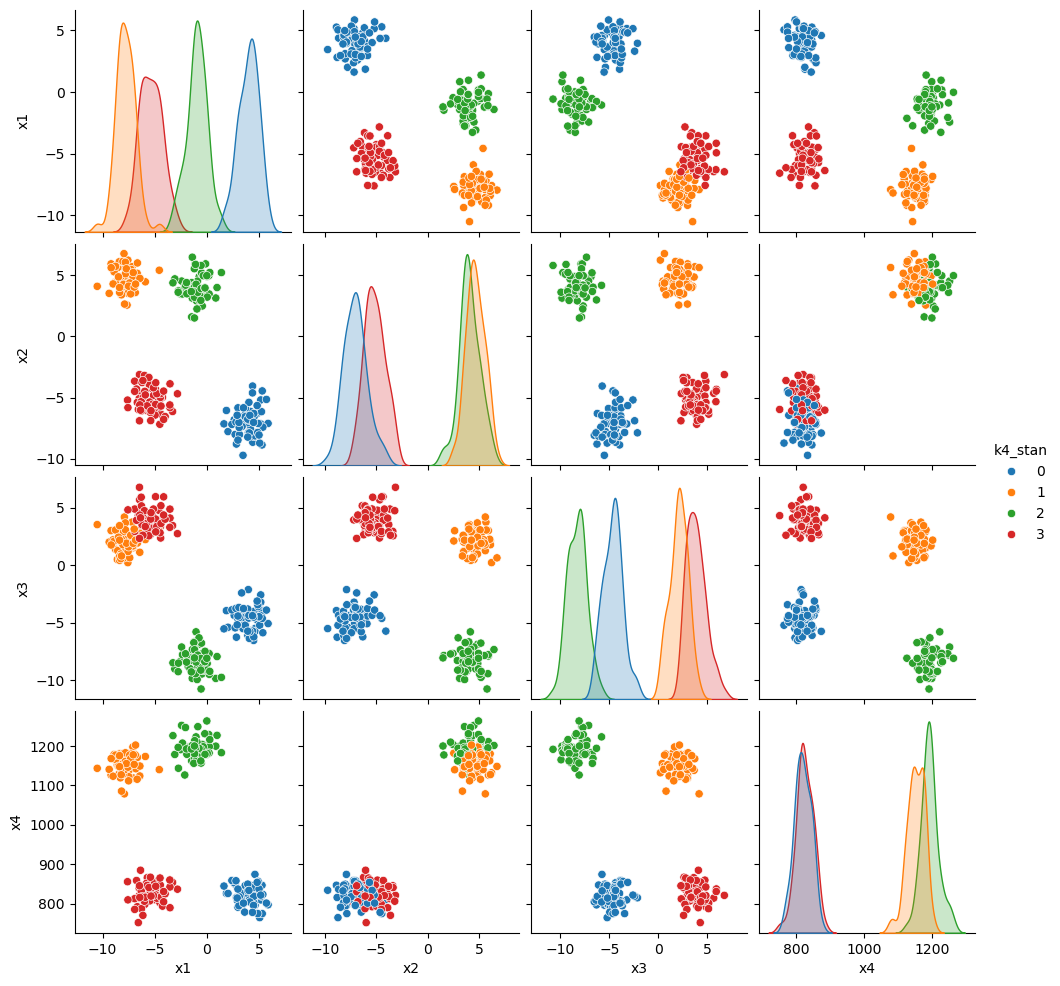

In [107]:
# visualize cluster analysis using pairplot with hue and removed SAMPLE SIZE
sns.pairplot(data=dfC_copy_stan, hue='k4_stan',
             diag_kws={'common_norm':False})

### 2g)

Are the 4 identified clusters consistent with what you expected them to be?

#### 2g) - SOLUTION

Type your response in a markdown cell below.

Yes they are. The clusters are more clear and distinct.

### 2h) 

Based on these questions, why do you think standardization is such an important operation to perform before clustering?

#### 2h) - SOLUTION

Type your response in a markdown cell below.

Based on these questions, why do you think standardization is such an important operation to perform before clustering?

Standardization can make the clusters more clear and distinct. It can also make the clusters more logically consistent with what we expected them to be.

## Problem 03

Let's now shift focus and work on the fundamentals of fitting and interperting linear models for regression. You will repeat important actions on several data sets to gain experience working with linear models. Each of the following examples involves a single continuous input and continuous output just as the lecture recordings for this week. In each of the following examples the input variable is named `x` and the output variable is named `y`.  

You will use the `statsmodels` formula interface to fit the models.

### 3a)

Import the `statsmodels.formula.api` as `smf`.

#### 3a) - SOLUTION

In [108]:
import statsmodels.formula.api as smf

### 3b)

Read in the `hw08_lmA.csv` CSV file and assign it to the `dfA` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

#### 3b) - SOLUTION

In [109]:
dfA = pd.read_csv('hw08_lmA.csv')
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       21 non-null     float64
 1   y       21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


### 3c)

You will NOT visually explore the variables in data for the regression problems in this assignment. Visual exploration is essential before fitting models, but this assignment is focused on introducing you to the important functions. That said, you must visualize the relationship between the OUTPUT and the INPUT. 

Create a scatter plot to visualize the OUTPUT and INPUT relationship using Seaborn.

Do you think there is a negative or positive relationship between the two variables based on your visualization?

#### 3c) - SOLUTION

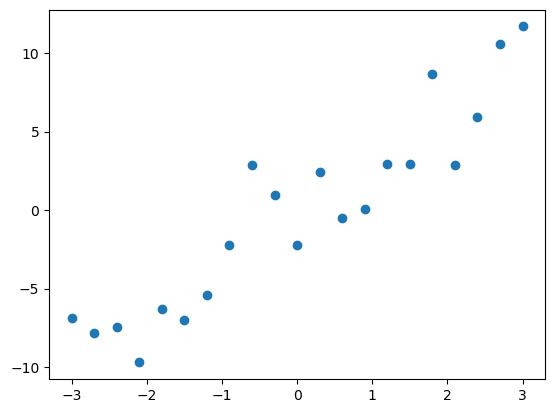

In [110]:
plt.scatter(data=dfA, x='x', y='y')

Yes, there is a positive relationship between the two variables.

### 3d)

Let's now fit your first linear model! You will fit the model for the classic or conventional "best fit line" between the OUTPUT and INPUT.

Fit a linear model using the `statsmodels` formula interface which uses a LINEAR RELATIONSHIP between the TREND and the INPUT.

Assign the fitted model to the `modA` object.

Print the `.summary()` method to the screen after fitting.

#### 3d) - SOLUTION

In [112]:
modA = smf.ols(formula='y ~ x', data=dfA).fit()
print(modA.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.51e-09
Time:                        00:42:08   Log-Likelihood:                -47.180
No. Observations:                  21   AIC:                             98.36
Df Residuals:                      19   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1726      0.525     -0.329      0.7

### 3e)

The `.summary()` method provides many useful and important details associated with the linear model. However, most of that information can be accessed and reporting using other attributes and methods associated with the `statsmodels` fitted model object.

Display the regression coefficient estimates using the appropriate attribute of `modA`.

Is the slope multiplying the input positive or negative?

#### 3e) - SOLUTION

In [113]:
modA.params

Intercept   -0.172588
x            3.119407
dtype: float64

The multiplication between the input and the slope is positive.

### 3f)

Display the regression coefficient standard errors using the appropriate attribute of `modA` to the screen.

Do you know if the coefficients are STATISTICALLY SIGNIFICANT based on the standard error values ALONE?

#### 3f - SOLUTION

In [114]:
modA.bse

Intercept    0.524938
x            0.288969
dtype: float64

No, we do not know if the coefficients are statistically significant based on the standard error values alone.
We need the p-value to determine if the coefficients are statistically significant.

### 3g)

Display the p-value associated with the regression coefficients using the appropriate attribute of `modA` to the screen.

Is the INPUT considered to be STATISTICALLY SIGNIFICANT using COMMONLY accepted significance criteria?

#### 3g) - SOLUTION

In [118]:
print(modA.pvalues)
modA.pvalues < 0.05

Intercept    7.459199e-01
x            1.513984e-09
dtype: float64


Intercept    False
x             True
dtype: bool

The intercept is not statistically significant, but the 1st order coefficient is statistically significant.

### 3h)

Display the regression coefficient 95% confidence intervals using the appropriate method of `modA` to the screen.

The confidence interval bounds must be named `conf_lwr` and `conf_upr`.

How does the 95% confidence interval tell you if the INPUT is STATISTICALLY SIGNIFICANT using COMMONLY accepted significance criteria?

#### 3h) - SOLUTION

In [119]:
modA.conf_int()\
    .rename(columns={0:'conf_lwr', 1:'conf_upr'})

,conf_lwr,conf_upr
Intercept,-1.271296,0.926120
x,2.514589,3.724226


If 0 is contained between the conf_lwr and conf_upr, then the coorelated coefficient is not statistically significant.

## Problem 04

Now that you have examined the regression coefficients, it is time to interpret and visualize behavior via predictions.

However, as discussed in lecture it is not sufficient to predict the training set alone. Instead, you will predict a NEW data set that consists of input values NOT present in the training data. This NEW data will NOT contain the OUTPUT. The model will PREDICT the output using these NEW input values!

### 4a)

Create a NEW Pandas DataFrame, `dfA_viz`, that contains a single column named `x`. This column must consist of 101 evenly spaced values between the training set MINIMUM and training set MAXIMUM `x` values. Remember that the training set is contained in the `dfA` DataFrame.

Display the `.nunique()` method associated with `dfA_viz` to the screen to confirm it was created correctly.

#### 4a) - SOLUTION

In [122]:
dfA_viz = pd.DataFrame({'x':np.linspace(dfA.x.min(), dfA.x.max(), num=101)})
dfA_viz.nunique()

x    101
dtype: int64

### 4b)

As discussed in lecture, linear model predictions require more than just producing a SINGLE number. To fully understand the model we must consider the predictive TREND, the UNCERTAINTY on the TREND, **and** the UNCERTAINTY on a single output observation!

You must use the appropriate method to "get" the predictions for `modA` on the NEW data set, `dfA_viz`. Assign the predictions to the `modA_pred_object` object.

**IMPORTANT**: The `modA_pred_object` is NOT a DataFrame. It is a `statsmodels` specific data type.

#### 4b) - SOLUTION

In [125]:
modA_pred_object = modA.get_prediction(dfA_viz)
print(type(modA_pred_object))

<class 'statsmodels.regression._prediction.PredictionResults'>


### 4c)

The `modA_pred_object` is a "strange" data type. You need to apply one more method to correctly **SUMMARIZE** the predictions and return the predicted MEAN output (the TREND), the confidence interval bounds, and the prediction interval bounds.

Apply the appropriate method to SUMMARIZE the predictions for `modA` on the new data set, `dfA_viz`. Assign the prediction summaries to the `modA_pred_summary` object. 

Display the head of `modA_pred_summary` object to the screen to confirm it is created correctly.

#### 4d) - SOLUTION

In [126]:
modA_pred_summary = modA_pred_object.summary_frame()
modA_pred_summary.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-9.530810,1.013453,-11.651991,-7.409629,-14.994302,-4.067318
1,-9.343646,0.998662,-11.433870,-7.253422,-14.795193,-3.892098
2,-9.156481,0.983955,-11.215922,-7.097040,-14.596300,-3.716662
3,-8.969317,0.969334,-10.998157,-6.940477,-14.397624,-3.541009
4,-8.782152,0.954805,-10.780582,-6.783723,-14.199167,-3.365137


### 4e)

You now have everything necessary to visualize the predictions of the `modA` model on the NEW data, `dfA_viz`! You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. Include the training set as black markers for reference.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 4e) - SOLUTION

In [133]:
modA_pred_summary['mean']

0     -9.530810
1     -9.343646
2     -9.156481
3     -8.969317
4     -8.782152
         ...   
96     8.436976
97     8.624141
98     8.811305
99     8.998470
100    9.185634
Name: mean, Length: 101, dtype: float64

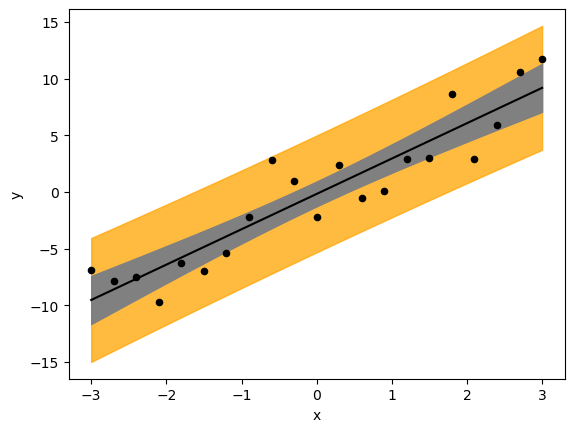

In [155]:
fig, ax = plt.subplots()

# prediction interval - the uncertainty on the individual output
ax.fill_between( dfA_viz.x,
                    modA_pred_summary.obs_ci_lower,
                    modA_pred_summary.obs_ci_upper,
                    facecolor='orange', edgecolor='orange', alpha=0.75)

# confidence interval - the uncertainty on the mean output
ax.fill_between( dfA_viz.x,
                    modA_pred_summary.mean_ci_lower,
                    modA_pred_summary.mean_ci_upper,
                    facecolor='grey', edgecolor='grey')

# output mean
ax.plot(dfA_viz.x, modA_pred_summary['mean'], color='k',linewidth=1.5)

# include training data
ax.scatter(dfA.x, dfA.y, color='k', marker='o', s=20)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

### 4f)

Is the predictive trend visualized in 4e) consistent with your conclusions about the input's statistical significance in Problem 03?

#### 4f) - SOLUTION

Type your response in a markdown cell below.

Yes, we have the statistically correct increasing trend as concluded before, but the intercept is not statistically significant.

### 4g)

Are the training set observations mostly "contained" within the confidence interval or prediction interval in 4e)?

Why is that the case?

#### 4g) - SOLUTION

Type your response in a markdown cell below.

Yes, they are mainly contained within the prediction interval. The confidence interval represents the uncertainty of the mean, while the prediction interval represents the uncertainty of a single observation, which is larger than the uncertainty of the mean.

## Problem 05

Now that you have practiced working with linear models, let's try a more challenging situation.

### 5a)

Read in the `hw08_lmB.csv` CSV file and assign it to the `dfB` object.

Apply the `.info()` method to display useful information associated with the columns in the data set.

#### 5a) - SOLUTION

In [137]:
dfB = pd.read_csv('hw08_lmB.csv')
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       45 non-null     float64
 1   y       45 non-null     float64
dtypes: float64(2)
memory usage: 848.0 bytes


### 5b)

As before, you will not perform a detailed visual exploration of the data. However, it is essential to examine the relationship between the OUTPUT and INPUT before fitting models.

Create a scatter plot to visualize the OUTPUT and INPUT relationship using Seaborn.

How would you describe the relationship between the two variables based on your visualization?

#### 5b) - SOLUTION

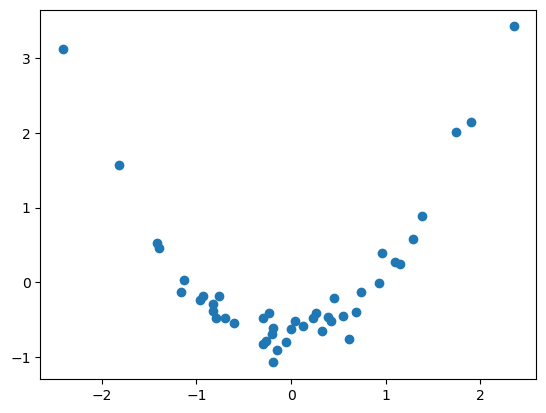

In [138]:
plt.scatter(data=dfB, x='x', y='y')

It looks like a parabola.

### 5c)

You will fit MULTIPLE models in this problem. You will start with the SIMPLEST POSSIBLE LINEAR MODEL. You will start with an INTERCEPT-ONLY or CONSTANT AVERAGE model.

Fit a linear model using the `statsmodels` formula interface which uses a CONSTANT for the OUTPUT. Therefore, this model assumes there is NO relationship between the OUTPUT and the INPUT.

Assign the fitted model to the `modB_00` object.

Print the `.summary()` method to the screen after fitting.

#### 5c) - SOLUTION

In [139]:
modB_00 = smf.ols(formula='y ~ 1', data=dfB).fit()
print(modB_00.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                nan
Time:                        01:11:42   Log-Likelihood:                -63.347
No. Observations:                  45   AIC:                             128.7
Df Residuals:                      44   BIC:                             130.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-17      0.149  -1.86e-16      1.0

### 5d)

Let's fit another model BEFORE examining the coefficients in detail. 

The next model is the classic or conventional "best fit line" which assumes a LINEAR RELATIONSHIP between the TREND and the INPUT.

Fit a linear model using the `statsmodels` formula interface which uses a LINEAR RELATIONSHIP between the TREND and the INPUT.

Assign the fitted model to the `modB_01` object.

Print the `.summary()` method to the screen after fitting.

#### 5d) - SOLUTION

In [140]:
modB_01 = smf.ols(formula='y ~ x', data=dfB).fit()
print(modB_01.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.572
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.217
Time:                        01:12:12   Log-Likelihood:                -62.539
No. Observations:                  45   AIC:                             129.1
Df Residuals:                      43   BIC:                             132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.082e-17      0.148  -1.41e-16      1.0

### 5e)

Lastly, let's fit a model which includes a NON-LINEAR relationship between the TREND and the INPUT!

Fit a linear model using the `statsmodels` formula interface which includes the LINEAR **feature** and QUADRATIC **feature** between the TREND and the INPUT. This model is therefore a SECOND DEGREE polynomial between the TREND and the INPUT.

Assign the fitted model to the `modB_02` object.

Print the `.summary()` method to the screen after fitting.

#### 5e) - SOLUTION

In [141]:
modB_02 = smf.ols(formula='y ~ x + I(x**2)', data=dfB).fit()
print(modB_02.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     823.3
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.04e-34
Time:                        01:13:00   Log-Likelihood:                 19.769
No. Observations:                  45   AIC:                            -33.54
Df Residuals:                      42   BIC:                            -28.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6953      0.030    -23.390      0.0

### 5f)

The coefficient summaries are reported within the `.summary()` table displayed for each of the three models. However, let's examine regression coefficients using a visualization which shows their estimates and confidence intervals. This visualization therefore allows us to determine which coefficients are statistically significant!

The lecture recordings demonstrated how to create the **COEFFICIENT PLOT** for a linear model. This plot uses error bars to show the 95% confidence interval around the estimate. The lecture recordings discussed two ways to create the figure. The first used an approximation to the 95% confidence interval and the second used the exact 95% confidence interval. You are allowed to use the **approximation** method for this assignment.

Create a function `my_coefplot()` which has 2 arguments. The zeroth argument, `mod`, is a `statsmodel` fitted model object. The first argument, `figsize_use`, allows the user to specify the figure size. A default `figsize_use` of `(10, 4)` should be used. The `my_coefplot()` function must create the error bars with matplotlib axis object methods. A vertical reference line must be located at 0. The axis labels must be labeled accordingly.

#### 5f) - SOLUTION

In [142]:
def my_coefplot(mod,figsize_use=(10,4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

### 5g)

Create the COEFFICIENT PLOTS for each of the models fit to the `dfB` data set: `modB_00`, `modB_01`, and `modB_02`. 

Which features are statistically signficant for the models based on your visualizations?

#### 5g) - SOLUTION

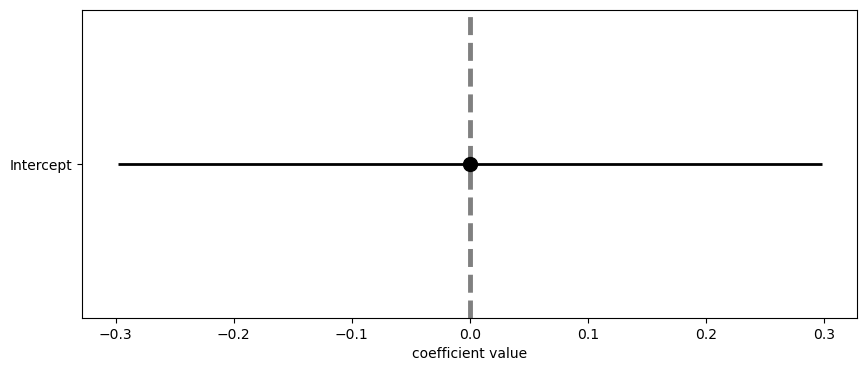

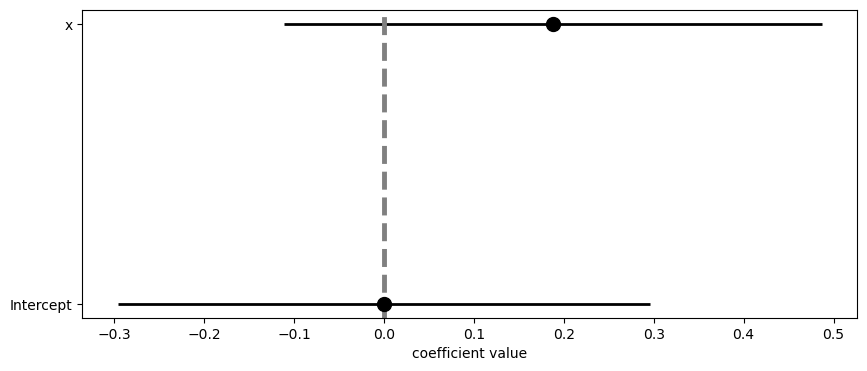

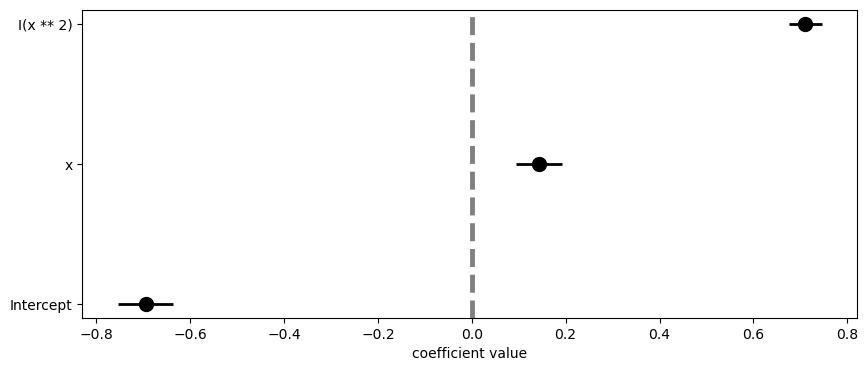

In [143]:
for mod in [modB_00, modB_01, modB_02]:
    my_coefplot(mod)

Only for modB_02, all the features are statistically significant.

## Problem 06

You fit 3 models to `dfB`. They each captured different types of RELATIONSHIPS between the TREND and the INPUT. The first, `modB_00` assumed NO TREND. The second, `modB_01`, assumed a LINEAR relationship. The third, `modB_02`, assumed a QUADRATIC relationship.

Let's now examine the training set PERFORMANCE and visually compare the behavior through predictions.

### 6a)

Display the R-squared performance metric to the screen for each of the 3 models.

Which model has the best R-squared value on the training set?

#### 6a) - SOLUTION

In [144]:
# print R-squared values for three models
for mod in [modB_00, modB_01, modB_02]:
    print(mod.rsquared)


0.0
0.035270475898198206
0.9751287319477502


modB_02 has the best R-squared value on the training set at about 0.975

### 6b) 

Calculate the RMSE for each of the 3 models and display each model's RMSE to the screen.

Which model has the best RMSE value on the training set?

#### 6b) - SOLUTION

In [145]:
# print RMSE
for mod in [modB_00, modB_01, modB_02]:
    print(np.sqrt((mod.resid ** 2).mean()))

0.9888264649460884
0.9712317386869485
0.1559441348901722


modB_02 has the best RMSE value on the training set at about 0.156

### 6c)

Studying behavior via predictions requires creating a NEW data set, just as you did in Problem 04. However, this NEW data set will be specific to the `dfB` context.

Create a NEW Pandas DataFrame, `dfB_viz`, that contains a single column named `x`. This column must consist of 151 evenly spaced values between the training set MINIMUM and training set MAXIMUM `x` values. Remember that the training set is contained in the `dfB` DataFrame. Please note that 151 unique values are used in this problem to make sure things are different between your previous `dfA_viz` DataFrame. You cannot simply copy and paste!

Display the `.nunique()` method associated with `dfB_viz` to the screen to confirm it was created correctly.

#### 6c) - SOLUTION

In [146]:
dfB_viz = pd.DataFrame({'x':np.linspace(dfB.x.min(), dfB.x.max(), num=151)})
dfB_viz.nunique()

x    151
dtype: int64

### 6d) 

You must now use the appropriate method to "get" the predictions for each of the 3 models on the NEW data set, `dfB_viz`. You must repeat the actions 3 times, once for each model. 

Assign the predictions for `modB_00` to `modB_00_pred_object`. Assign the predictions for `modB_01` to `modB_01_pred_object`. Assign the predictions for `modB_02` to `modB_02_pred_object`.

#### 6d) - SOLUTION

In [147]:
modB_00 = smf.ols(formula='y ~ 1', data=dfB).fit()
modB_00_pred_object = modB_00.get_prediction(dfB_viz)

modB_01 = smf.ols(formula='y ~ x', data=dfB).fit()
modB_01_pred_object = modB_01.get_prediction(dfB_viz)

modB_02 = smf.ols(formula='y ~ x + I(x**2)', data=dfB).fit()
modB_02_pred_object = modB_02.get_prediction(dfB_viz)

### 6e)

Apply the appropriate method to SUMMARIZE the predictions for each of the 3 models on the new data set, `dfB_viz`. You must repeat the actions 3 times, once for each model. 

Assign the prediction summaries for `modB_00` to `modB_00_pred_summary`. Assign the prediction summaries for `modB_01` to `modB_01_pred_summary`. Assign the prediction summaries for `modB_02` to `modB_02_pred_summary`. 

#### 6e) - SOLUTION

In [148]:
# summarize
modB_00_pred_summary = modB_00_pred_object.summary_frame()
modB_01_pred_summary = modB_01_pred_object.summary_frame()
modB_02_pred_summary = modB_02_pred_object.summary_frame()

### 6f)

You now have everything in place to visualize the predictive behavior for each model on the NEW `dfB_viz` data set!

Let's start with the NO TREND or INTERCEPT-ONLY model, `modB_00`.

You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. Include the training set as black markers for reference.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 6f) - SOLUTION

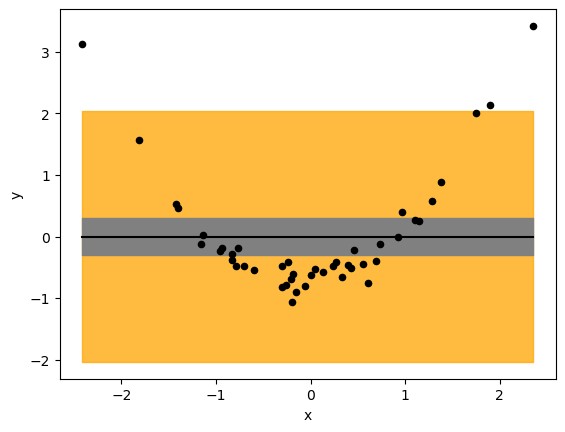

In [154]:
# plot
fig, ax = plt.subplots()

# prediction interval - the uncertainty on the individual output
ax.fill_between( dfB_viz.x,
                    modB_00_pred_summary.obs_ci_lower,
                    modB_00_pred_summary.obs_ci_upper,
                    facecolor='orange', edgecolor='orange', alpha=0.75)

# confidence interval - the uncertainty on the mean output
ax.fill_between( dfB_viz.x,
                    modB_00_pred_summary.mean_ci_lower,
                    modB_00_pred_summary.mean_ci_upper,
                    facecolor='grey', edgecolor='grey')

# output mean
ax.plot(dfB_viz.x, modB_00_pred_summary['mean'], color='k',linewidth=1.5)

# include training data
ax.scatter(dfB.x, dfB.y, color='k', marker='o', s=20)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

### 6g)

Let's now visualize the predictions for the LINEAR RELATIONSHIP model, `modB_01`.

You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. Include the training set as black markers for reference.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 6g) - SOLUTION

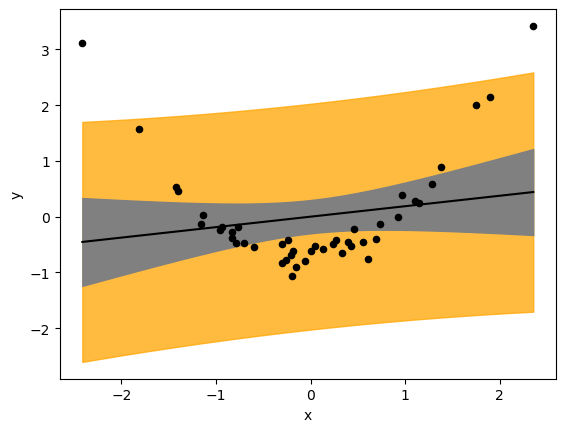

In [153]:
# plot
fig, ax = plt.subplots()

# prediction interval - the uncertainty on the individual output
ax.fill_between( dfB_viz.x,
                    modB_01_pred_summary.obs_ci_lower,
                    modB_01_pred_summary.obs_ci_upper,
                    facecolor='orange', edgecolor='orange', alpha=0.75)

# confidence interval - the uncertainty on the mean output
ax.fill_between( dfB_viz.x,
                    modB_01_pred_summary.mean_ci_lower,
                    modB_01_pred_summary.mean_ci_upper,
                    facecolor='grey', edgecolor='grey')

# output mean
ax.plot(dfB_viz.x, modB_01_pred_summary['mean'], color='k',linewidth=1.5)

# include training data
ax.scatter(dfB.x, dfB.y, color='k', marker='o', s=20)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

### 6h)

Finally, let's visualize the predictions for the QUADRATIC RELATIONSHIP model, `modB_02`.

You must visualize the predictive trend and BOTH types of uncertainty with respect to the input `x`.

You must visualize the predicted MEAN output (the trend) as a line. You must visualize the confidence interval as a grey ribbon. You must visualize the prediction interval as an orange ribbon. Include the training set as black markers for reference.

Create the figure using matplotlib methods associated with the matplotlib axis object. Label the x and y axis correctly.

#### 6h) - SOLUTION

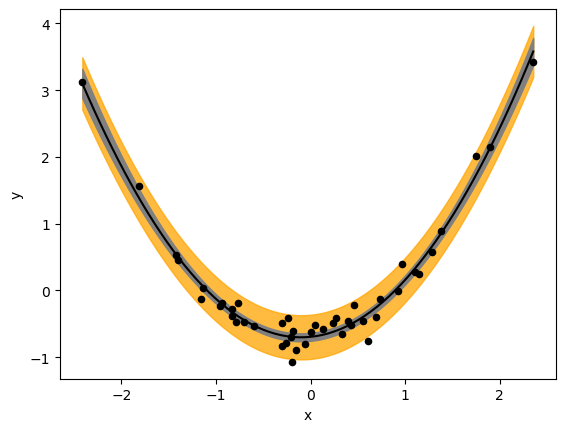

In [152]:
# plot
fig, ax = plt.subplots()

# prediction interval - the uncertainty on the individual output
ax.fill_between( dfB_viz.x,
                    modB_02_pred_summary.obs_ci_lower,
                    modB_02_pred_summary.obs_ci_upper,
                    facecolor='orange', edgecolor='orange', alpha=0.75)

# confidence interval - the uncertainty on the mean output
ax.fill_between( dfB_viz.x,
                    modB_02_pred_summary.mean_ci_lower,
                    modB_02_pred_summary.mean_ci_upper,
                    facecolor='grey', edgecolor='grey')

# output mean
ax.plot(dfB_viz.x, modB_02_pred_summary['mean'], color='k',linewidth=1.5)

# include training data
ax.scatter(dfB.x, dfB.y, color='k', marker='o', s=20)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

### 6i)

Which of the 3 models has predictions that appear the most consistent with the observed training set?

#### 6i) - SOLUTION

Type your response in a markdown cell below.

The quadratic model has predictions that appear the most consistent with the observed training set.

### 6j)

Are the predictions for the 3 types of models consistent with the R-squared and RMSE performance metrics you calculated in 6a) and 6b)? Essentially, are your prediction visualizations consistent with the model identified as the BEST according to R-squared and RMSE?

#### 6j) - SOLUTION

Type your response in a markdown cell below.

Yes they are consistent with the R-squared and RMSE performance metrics.

Essentially, the R-squared represents the proportion of variance explained by the model, and the RMSE represents the average error of the model. The quadratic model has the highest R-squared and the lowest RMSE, which means it has the best performance. Therefore, the predictions for the quadratic model are consistent with the R-squared and RMSE performance metrics.